# Day 4 - Data Science Essentials Program
NAMR - Apr 2024

**Agenda for today**
- Take-up of the Decision Tree assignment and ccp_alpha pruning
- Model selection
    - Cross-validation - stratified
    - Cross-validation - group
- Extra resources and other models

**Before we get started**
- open up the `DecisionTreeAssignmentAnswer.ipynb` file (in Solutions folder)

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

In [3]:
from sklearn.metrics import recall_score, precision_score

In [2]:
df = pd.read_csv("ExData/car_data.csv")
df.set_index(["User ID"], inplace=True)
df = pd.concat([df, pd.get_dummies(df['Gender'],dtype=int)], axis=1)
# df.head(10)

In [4]:
clf = tree.DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(df[['Age', 'AnnualSalary']], df['Purchased'],
                                                    test_size=0.25, random_state=42)

In [7]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

**Steps to find best model - Decision Tree**
1) create empty lists to store all results you need
2) loop through all the options of ccp_alphas
3) inside the loop re-run the models, and append to the empty lists all the results
4) create a table out of all the results and pick best model

In [12]:
#Loop that creates all the 39 different models, while it's looping save down all the metrics we need
#Step 1 - empty lists
models = [] #save all the DT models
train_scores = [] #accuracy
test_scores = [] #accuracy
test_recall = []
test_precision = []
nodes = []
leaves = []
depths = []

#Step 2 - loop through alphas
for alpha in ccp_alphas:
    # print(alpha)
    #Step 3 - re-run the models
    clf = tree.DecisionTreeClassifier(ccp_alpha=alpha, random_state=0)
    clf.fit(X_train, y_train)
    models.append(clf)

    #calc the scores
    score_train = clf.score(X_train, y_train) #accuracy score for just train
    score_test = clf.score(X_test, y_test) #accuracy score for just test
    train_scores.append(score_train)
    test_scores.append(score_test)

    recall = recall_score(y_test, clf.predict(X_test))
    prec = precision_score(y_test, clf.predict(X_test))
    test_recall.append(recall)
    test_precision.append(prec)

    #information about the tree
    nodes.append(clf.tree_.node_count)
    leaves.append(clf.get_n_leaves())
    depths.append(clf.get_depth())

c:\users\v806013\ds\tools\python3.8\latest\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
#Step 4 - create a table
results = pd.DataFrame( {'Train Score': train_scores,
                        'Test Score':test_scores,
                        'Test Precision':test_precision,
                        'Test Recall':test_recall,
                        'Nodes':nodes,
                        'Leaves':leaves,
                        'Depths':depths,
                        'Alpha':ccp_alphas}   )
results

,Train Score,Test Score,Test Precision,Test Recall,Nodes,Leaves,Depths,Alpha
0,0.993333,0.864,0.867925,0.821429,217,109,18,0.000000
1,0.993333,0.864,0.867925,0.821429,215,108,18,0.000222
2,0.993333,0.864,0.867925,0.821429,211,106,18,0.000400
3,0.993333,0.864,0.867925,0.821429,207,104,18,0.000444
4,0.993333,0.864,0.867925,0.821429,207,104,18,0.000444
5,0.986667,0.864,0.875000,0.812500,185,93,14,0.000711
6,0.985333,0.864,0.875000,0.812500,179,90,14,0.000762
7,0.985333,0.864,0.875000,0.812500,177,89,14,0.000800
8,0.982667,0.864,0.875000,0.812500,165,83,14,0.000808
9,0.982667,0.864,0.875000,0.812500,165,83,14,0.000808


In [23]:
best_model_index = results.sort_values('Test Score', ascending=False).index[0]
best_ccp = ccp_alphas[best_model_index]

best_model_index, best_ccp

(23, 0.0012839506172839501)

In [27]:
results.sort_values('Test Score', ascending=False)['Alpha'].iloc[0]

0.0012839506172839501

In [29]:
best_clf = models[best_model_index]
best_clf

DecisionTreeClassifier(ccp_alpha=0.0012839506172839501, random_state=0)

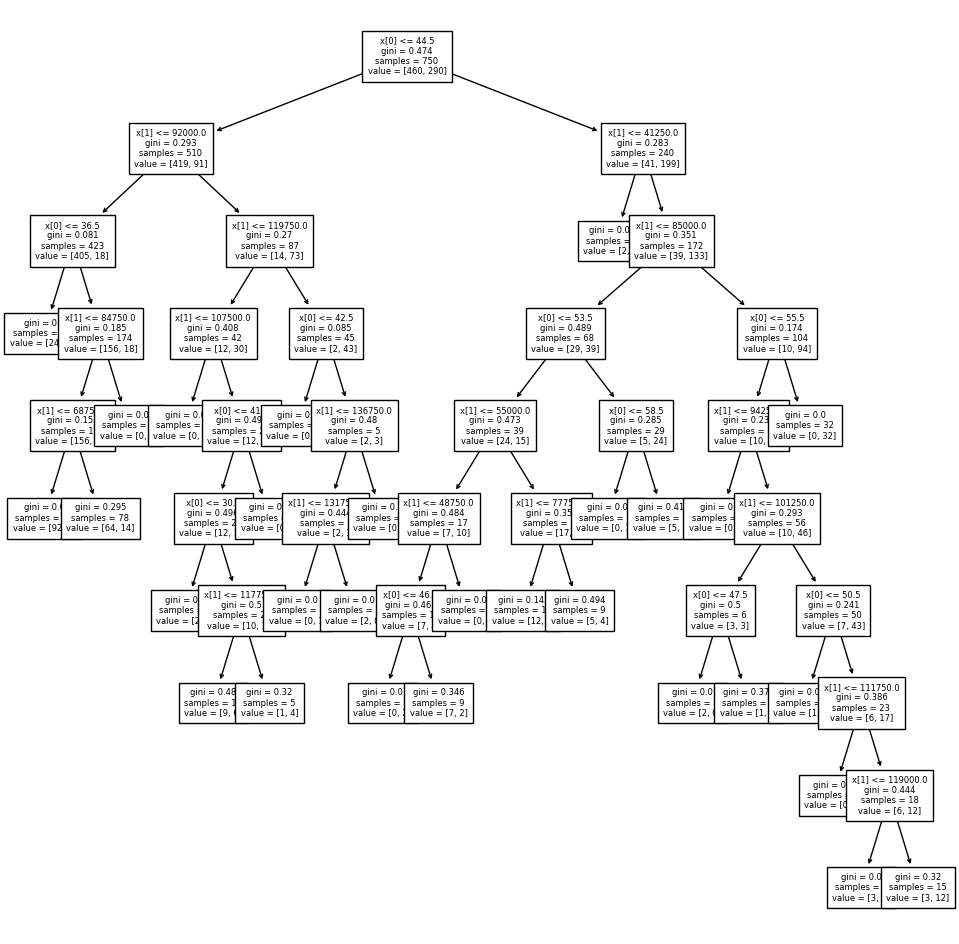

In [33]:
plt.figure(figsize=(12,12))
tree.plot_tree(best_clf, fontsize=6)
plt.show()

## Coffee break until 10:15am EST

Feedback surveys (both links in the chat):
- TTS: https://www.coursecheck.com/ref/1/422/261894 --> info goes to me and my employer (can choose to write feedback anonymously)
- JPM: https://www.surveymonkey.com/r/VFQYMNL --> info is private and goes to JPM (I get a summary)



# Model Selection
- open the `ModelSelection.ipynb` file
- import the packages at the top of the file
- slide 83 in the presentation

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import (KFold, StratifiedKFold, GroupKFold)

In [38]:
df = pd.read_csv("ExData/car_data.csv", index_col=['User ID'])
df = pd.concat([df, pd.get_dummies(df['Gender'],dtype=int)], axis=1)

## Cross Validation
- `cross_val_score(model, X, y, cv=number of tests, scoring=metric)`
    - default scoring=accuracy if your model is a classification model
    - but you can change to precision or recall or something else
    - `scoring='precision'` or `scoring='recall'`

In [66]:
clf = tree.DecisionTreeClassifier(random_state=42, ccp_alpha=0)
scores = cross_val_score(clf, df[['Age', 'AnnualSalary', 'Female']], df['Purchased'], cv=5)
scores, scores.mean(), scores.max(), scores.min(), scores.std() #scores of the TEST data within each test

(array([0.88 , 0.875, 0.905, 0.875, 0.87 ]),
 0.881,
 0.905,
 0.87,
 0.012409673645990868)

In [50]:
cross_val_score(clf, df[['Age','Female']], df['Purchased'], cv=5)

array([0.795, 0.81 , 0.835, 0.8  , 0.78 ])

In [51]:
cross_val_score(clf, df[['Age','AnnualSalary']], df['Purchased'], cv=5)

array([0.845, 0.855, 0.89 , 0.855, 0.845])

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [67]:
df['AnnualSalaryStd'] = StandardScaler().fit_transform(df[['AnnualSalary']])
clf_logistic = LogisticRegression(random_state=0)
scores = cross_val_score(clf_logistic, df[['Age', 'AnnualSalaryStd', 'Female']], df['Purchased'], cv=5)
scores, scores.mean(), scores.max(), scores.min(), scores.std() #scores of the TEST data within each test

(array([0.82, 0.82, 0.89, 0.84, 0.79]),
 0.8320000000000001,
 0.89,
 0.79,
 0.0331058907144937)

## Train/Test Split of Data
- 

In [68]:
X_train, X_test, y_train, y_test = train_test_split(df[['Age', 'AnnualSalary','AnnualSalaryStd','Female']],
                                                    df['Purchased'], 
                                                    test_size=0.2,
                                                    random_state=0)

In [69]:
x_columns = [['Age'], ['Age', 'AnnualSalary'], ['Age', 'Female']]

In [72]:
for x_cols in x_columns:
    print(x_cols)
    clf = tree.DecisionTreeClassifier(random_state=42, ccp_alpha=0)
    scores = cross_val_score(clf, X_train[x_cols], y_train, cv=5, scoring='recall')
    print(scores, scores.mean(), scores.max(), scores.min(), scores.std()) #scores of the TEST data within each test

['Age']
[0.671875   0.71875    0.58461538 0.72307692 0.76923077] 0.6935096153846154 0.7692307692307693 0.5846153846153846 0.0625635771310429
['Age', 'AnnualSalary']
[0.765625   0.859375   0.78461538 0.78461538 0.81538462] 0.8019230769230768 0.859375 0.765625 0.032859090971410876
['Age', 'Female']
[0.65625    0.640625   0.56923077 0.72307692 0.78461538] 0.6747596153846154 0.7846153846153846 0.5692307692307692 0.07354857912376186


In [73]:
best_xs = ['Age', 'AnnualSalary']
clf.fit(X_train[best_xs], y_train)

DecisionTreeClassifier(ccp_alpha=0, random_state=42)

In [80]:
print(classification_report(y_train, clf.predict(X_train[best_xs])))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       477
           1       1.00      0.98      0.99       323

    accuracy                           0.99       800
   macro avg       0.99      0.99      0.99       800
weighted avg       0.99      0.99      0.99       800



In [79]:
#Final Evaluation on data it has never seen and was not used to create the model
print(classification_report(y_test, clf.predict(X_test[best_xs])))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       121
           1       0.91      0.85      0.88        79

    accuracy                           0.91       200
   macro avg       0.91      0.90      0.90       200
weighted avg       0.91      0.91      0.90       200

